## Solve the following 1d balloon pop problem (linear acoustics)

\begin{equation*}
A =  \begin{vmatrix}
0 & K_0 \\
1/\rho_0 & 0
\end{vmatrix}
\end{equation*}


Initial Conditions:

$p_0(x) = 1$ if $1 <= x <= 2$

$p_0(x) = 0$ else

$u_0(x) = 0$


#### Plot initial conditions

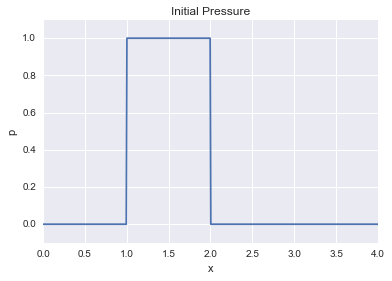

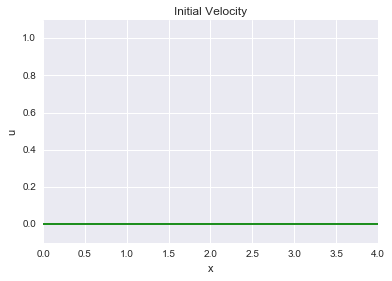

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = np.linspace(0,4,500)
p = np.zeros(np.size(x))
u = np.zeros(np.size(x))

for i in range(np.size(x)):
    if 1 <= x[i] and x[i] <= 2:
        p[i] = 1.
        
plt.plot(x,p)
plt.xlabel('x')
plt.ylabel('p')
plt.title('Initial Pressure')
plt.ylim((-0.1,np.max(p)+0.1))
plt.show()

plt.plot(x,u,color='green')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Initial Velocity')
plt.ylim((-0.1,np.max(p)+0.1))
plt.show()

### Now need to solve the riemann problem at each discontinuity

In [25]:
# Initialize 
rho_0 = 1.0
K_0 = 0.25
c_0 = np.sqrt(K_0/rho_0)  # sound speed
Z_0 = rho_0*c_0   # impedence

# Coefficient array
A = [[0,K_0],[1./rho_0,0]]

# Get eigenvectors and eigenvalues of coefficient array
eigenvalues,R = np.linalg.eig(A)

# Sort in ascending order
index = np.argsort(eigenvalues)
eigenvalues = eigenvalues[index]
R = R[:,index] # note COLUMN R[:,i] is the eigenvector for eigenvalue i

L = np.linalg.inv(R) # Get R^-1


left_jump = [1.,0]  # q_r - q_l for the left side of the pressure perturbation
right_jump = [-1.,0]  # q_r - q_l for the right side of the pressure perturbation

alpha_1 = np.matmul(L,left_jump)  # get strenth of jump across left characteristics
alpha_2 = np.matmul(L,right_jump)  # get strenth of jump across left characteristics


# Check that the decomposition is working
test_jump = np.matmul(R,alpha_1)
print 'Alpha 1:\n',alpha_1
print 'Original Jump:\n',np.asarray(left_jump)
print 'Recovered Jump:\n',test_jump

Alpha 1:
[-1.11803399  1.11803399]
Original Jump:
[ 1.  0.]
Recovered Jump:
[  1.00000000e+00   2.26966063e-17]


#### Now compose solution space based on the strength of each jump across its respective characteristic

In [58]:
# Initializie far left and far right q-values
q_left = [0.,0.]
q_right = [0.,0.]

W1 = alpha_1[0]*R[:,0]  # jump across left-bound left-characteristic
W2 = alpha_1[1]*R[:,1]  #jump across right-bound left-characteristic
W3 = alpha_2[0]*R[:,0]  # jump across left-bound right-characteristic
W4 = alpha_2[1]*R[:,1]  #jump across right-bound right-characteristic
W_array = [W1,W2,W3,W4]

x_0 = [1.,1.,2.,2.]  # starting location of the characteristics
eigenval_array = [eigenvalues[0],eigenvalues[1],eigenvalues[0],eigenvalues[1]] # eigenvalues of characteristics

# Define function to return q
def q(x,t,index):
    q = q_left[index]
    # Check if we have crossed each characteristic
    for i in range(np.shape(W_array)[0]):
        if (x-eigenval_array[i]*t) >= x_0[i]:
            q = q + W_array[i][index]
    return q

In [100]:
x_space = np.linspace(0,4,201)
t_space = np.linspace(0,4,201)

Names = ['Pressure','Velocity']


# Get solution for each variable
for variable_index in range(np.size(q_left)[0]):
    print 'Obtaining Solution for Variable',variable_index+1
    
    solution = np.zeros((np.size(x_space),np.size(t_space)))
    for i in range(np.size(x_space)):
        for j in range(np.size(t_space)):
            solution[i][j] = q(x_space[i],t_space[j],variable_index)  # solution[col][row]

    ## Plot
    plt.pcolormesh(x_space,t_space,solution.T,cmap='Greens',vmin=0.,vmax=1.1)
    plt.colorbar()
    for i in range(np.size(eigenval_array)):
        plt.plot(x_space,1./eigenval_array[i]*(x_space-x_0[i]),color='black')
    plt.ylim((0,np.max(t_space)))
    plt.xlim((np.min(x_space),np.max(x_space)))
    plt.title(Names[variable_index])
    plt.annotate(r'-c$_0$T',(0.2,1.5),rotation=-60,size=14)
    plt.annotate(r'c$_0$T',(2.4,1.5),rotation=60,size=14)

    plt.xlabel('X')
    plt.ylabel('T')
    #plt.savefig('variable_'+str(variable_index)+'.pdf')
    #plt.clf()
    plt.show()
print 'Done'

TypeError: 'int' object has no attribute '__getitem__'

In [54]:
print R[:,0]
print R[:,1]

[-0.4472136   0.89442719]
[ 0.4472136   0.89442719]
